https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Mod A:**

Preprocessing

Imputation

Clustering

EDA

Regression

**Mod B:**

NLP

AutoEncoder

# Introduction

According to the world health organization, Cardiovascular diseases (CVDs) are the leading cause of death globally. In 2019 alone, around 17.9 million people died from CVDs. Of these deaths, **85%** of them were due to heart diseases. There are many factors that play a role in increasing the risk of heart disease. Identifying these factors and their impact is paramount in the field of healthcare. Identifying patients who are at greater risk enables medical professionals to respond quickly and efficiently, saving more lives.

### About the Dataset:

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the [2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults](https://www.cdc.gov/brfss/annual_data/annual_data.htm). For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. 

**We made the decision to manually clean and predict the missing values after downloading the original dataset.**

<https://www.cdc.gov/brfss/annual_data/annual_data.htm>

Below is a description of the features collected for each patient: 

| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pylab import rcParams
import plotly.graph_objects as go
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import scipy
from kmodes.kprototypes import KPrototypes

# Data Preprocessing

In any data-driven project, data preprocessing is an essential step that can significantly impact the quality and performance of machine learning models. The heart disease dataset requires thorough data preprocessing to ensure that the data is in a suitable format for building predictive models. In this section, we outline the various data preprocessing steps performed on the dataset.

**Data Cleaning**

Handling Missing Values: Missing data points were identified and addressed. Depending on the extent of missing data in each column, we applied appropriate strategies such as removal and advanced imputation methods.

Duplicate Rows: Duplicate rows, if any, were removed to avoid biasing the model.

**Handling Outliers**

Outliers in the data were identified and treated through techniques such as trimming, transformation, or removal.

**Feature Engineering**

Creating New Features: New features were engineered to potentially enhance the predictive power of the model.
Feature Modification: Existing features were transformed or modified to better align with the model's assumptions.

**Value Mapping**

Specific values in the dataset were mapped to new values to ensure consistency and to address irregularities.

**Data Visualization**

Exploratory Data Analysis (EDA): Visualizations were created to gain insights into the data, identify patterns, and understand the relationships between features and the target variable.

In [2]:
df = pd.read_csv('datasets/heart_cdc.csv')

In [3]:
# Define a dictionary for column renaming
columns_name_mapping = {
    "cvdcrhd4": "HeartDisease",
    "weight2": "Weight", 
    "height3":"Height", 
    "_smoker3":"Smoking", 
    "drnkany5":"AlcoholDrinking", 
    "cvdstrk3":"Stroke", 
    "physhlth":"PhysicalHealth",
    "menthlth":"MentalHealth", 
    "diffwalk":"DiffWalking", 
    "_sex":"Sex", 
    "_ageg5yr":"AgeCategory", 
    "_race":"Race", 
    "diabete4":"Diabetic", 
    "exerany2":"PhysicalActivity", 
    "genhlth":"GenHealth", 
    "sleptim1":"SleepTime", 
    "_asthms1":"Asthma", 
    "chckdny2":"KidneyDisease", 
    "chcscncr":"SkinCancer",
    "_bmi5":"BMI_calc"
}

# Define a list of the columns you want to keep
columns_to_keep = [ 
    "HeartDisease",
    "Weight", 
    "Height", 
    "Smoking", 
    "AlcoholDrinking", 
    "Stroke", 
    "PhysicalHealth",
    "MentalHealth", 
    "DiffWalking", 
    "Sex", 
    "AgeCategory", 
    "Race", 
    "Diabetic", 
    "PhysicalActivity", 
    "GenHealth", 
    "SleepTime", 
    "Asthma", 
    "KidneyDisease", 
    "SkinCancer",
    "BMI_calc"
]

# Rename columns and select the columns to keep in one step
df = df.rename(columns=columns_name_mapping)[columns_to_keep]

In [4]:
df.head()

,HeartDisease,Weight,Height,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,2.0,106.0,507.0,1,2,2.0,3.0,30.0,2.0,2,8,1.0,1.0,1.0,2.0,5.0,1,2.0,1.0,1660.0
1,2.0,170.0,504.0,9,9,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,2,2.0,2.0,2918.0
2,2.0,7777.0,508.0,4,2,2.0,88.0,88.0,2.0,2,10,2.0,3.0,1.0,3.0,7.0,3,2.0,2.0,NaN
3,2.0,9999.0,9999.0,4,2,2.0,88.0,88.0,2.0,2,13,1.0,3.0,2.0,1.0,6.0,3,2.0,2.0,NaN
4,2.0,126.0,506.0,4,2,1.0,88.0,88.0,2.0,2,13,1.0,3.0,1.0,2.0,7.0,3,2.0,2.0,2034.0


In [5]:
df.isna().any()

HeartDisease         True
Weight               True
Height               True
Smoking             False
AlcoholDrinking     False
Stroke               True
PhysicalHealth       True
MentalHealth         True
DiffWalking          True
Sex                 False
AgeCategory         False
Race                 True
Diabetic             True
PhysicalActivity     True
GenHealth            True
SleepTime            True
Asthma              False
KidneyDisease        True
SkinCancer           True
BMI_calc             True
dtype: bool

<Figure size 1600x800 with 0 Axes>

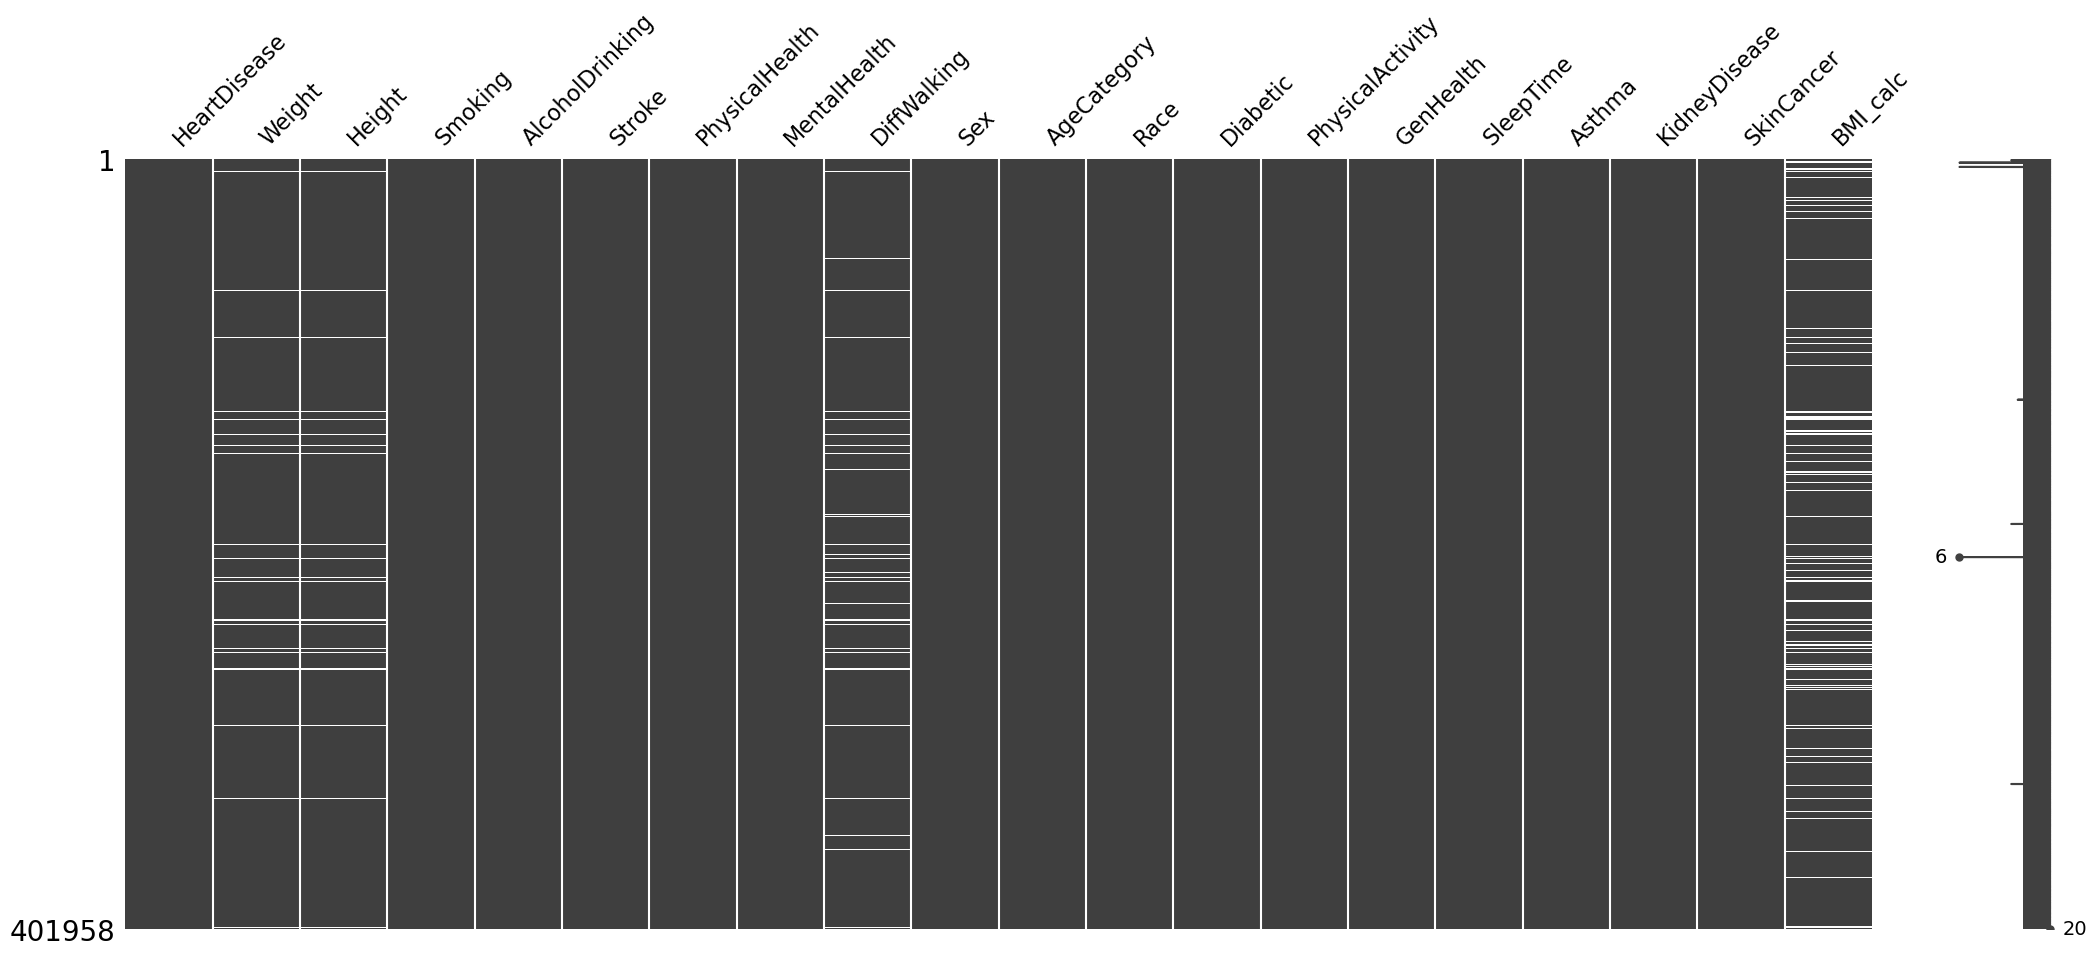

<Figure size 1600x800 with 0 Axes>

In [6]:
msno.matrix(df)
plt.figure(figsize = (16,8))

In [7]:
print(df.isna().sum())

HeartDisease            3
Weight               9852
Height              10824
Smoking                 0
AlcoholDrinking         0
Stroke                  3
PhysicalHealth          5
MentalHealth            5
DiffWalking         15280
Sex                     0
AgeCategory             0
Race                    1
Diabetic                6
PhysicalActivity        3
GenHealth               8
SleepTime               3
Asthma                  0
KidneyDisease           6
SkinCancer              3
BMI_calc            41357
dtype: int64


In [8]:
string_df = df.copy()

In [9]:
value_mapping = {
    'HeartDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'AlcoholDrinking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Stroke': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'PhysicalActivity': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'DiffWalking': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'SkinCancer': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'KidneyDisease': {1:'Yes', 2:'No', 7:'Not Clear', 9:'Refused'},
    'Asthma': {1:'Current', 2:'Former', 3:'Never', 9:'Not Clear'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 4:'Never', 9:'Not Clear'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80+', 14:'Not Clear'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic', 9:'Not Clear'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 3:'No', 4:'Border Line', 7:'Not Clear', 9:'Refused'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor', 7:'Not Clear', 9:'Refused'},
}

# Use the replace() method to change the values in the DataFrame
string_df.replace(value_mapping, inplace=True)

In [10]:
cat_var = ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Smoking', 'PhysicalActivity', 'DiffWalking', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

In [11]:
value_counts_dict = {}

for column in cat_var:
    value_counts = string_df[column].value_counts()
    value_counts_dict[column] = value_counts
    
for column, counts in value_counts_dict.items():
    print(f"Value Counts for {column}:")
    print(counts)
    print()

Value Counts for HeartDisease:
No           376058
Yes           22598
Not Clear      2962
Refused         337
Name: HeartDisease, dtype: int64

Value Counts for AlcoholDrinking:
Yes          191565
No           183618
Refused       23177
Not Clear      3598
Name: AlcoholDrinking, dtype: int64

Value Counts for Stroke:
No           385095
Yes           15677
Not Clear       891
Refused         292
Name: Stroke, dtype: int64

Value Counts for Smoking:
Never                 224535
Former Smoker         103835
Smoker                 38152
Not Clear              21100
Approximate Smoker     14336
Name: Smoking, dtype: int64

Value Counts for PhysicalActivity:
Yes          305883
No            95393
Not Clear       451
Refused         228
Name: PhysicalActivity, dtype: int64

Value Counts for DiffWalking:
No           327864
Yes           57335
Not Clear      1000
Refused         479
Name: DiffWalking, dtype: int64

Value Counts for SkinCancer:
No           364269
Yes           36414
Not Cl

In [12]:
num_var = ['Weight', 'Height', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [13]:
value_counts_dict = {}

for column in num_var:
    value_counts = string_df[column].value_counts()
    value_counts_dict[column] = value_counts
    
for column, counts in value_counts_dict.items():
    print(f"Value Counts for {column}:")
    print(counts)
    print()

Value Counts for Weight:
200.0     19745
180.0     18493
9999.0    17968
150.0     16636
160.0     16606
          ...  
565.0         1
523.0         1
9335.0        1
9205.0        1
9240.0        1
Name: Weight, Length: 574, dtype: int64

Value Counts for Height:
506.0     33784
504.0     33015
507.0     30496
505.0     29791
510.0     28639
          ...  
9132.0        1
9121.0        1
209.0         1
704.0         1
9139.0        1
Name: Height, Length: 147, dtype: int64

Value Counts for PhysicalHealth:
88.0    278671
30.0     25049
2.0      17864
1.0      12492
3.0      10371
5.0       9192
77.0      7095
10.0      6707
15.0      6247
7.0       5692
4.0       5396
20.0      4018
14.0      3561
99.0      1591
6.0       1531
25.0      1460
8.0       1149
21.0       774
12.0       735
28.0       574
29.0       265
9.0        234
18.0       214
16.0       172
27.0       165
17.0       129
13.0       117
11.0       108
22.0       106
24.0        87
26.0        83
23.0        62
19.

In [14]:
height_gt_6000 = df[df['Height'] > 6000]['Height']
print(height_gt_6000.value_counts())

9999.0    6863
7777.0    4039
9160.0     175
9170.0     171
9165.0     160
          ... 
9114.0       1
9132.0       1
9134.0       1
9202.0       1
9139.0       1
Name: Height, Length: 90, dtype: int64


In [15]:
height_gt_6000 = df[df['Weight'] > 6000]['Weight']
print(height_gt_6000.value_counts())

9999.0    17968
7777.0     7095
9070.0      108
9060.0       75
9075.0       73
          ...  
9147.0        1
9256.0        1
9023.0        1
9099.0        1
9240.0        1
Name: Weight, Length: 120, dtype: int64


In [16]:
value_mapping = {
    'HeartDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'AlcoholDrinking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Stroke': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'PhysicalActivity': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'DiffWalking': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'SkinCancer': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'KidneyDisease': {1:1, 2:0, 7:np.nan, 9:np.nan},
    'Asthma': {1:1, 2:2, 3:0, 9:np.nan},
    'Smoking': {1:1, 2:2, 3:3, 4:0, 9:np.nan},
    'AgeCategory': {14:np.nan},
    'Race': {9:np.nan},
    'Diabetic': {1:1, 2:2, 3:0, 4:0, 7:np.nan, 9:np.nan},
    'GenHealth': {1:1, 2:2, 3:3, 4:4, 5:5, 7:np.nan, 9:np.nan},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [17]:
df['Weight'] = [value if value <= 7000 else np.nan for value in df['Weight']]
df['Height'] = [value if value <= 7000 else np.nan for value in df['Height']]

In [18]:
df.head()

,HeartDisease,Weight,Height,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,0.0,106.0,507.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,1660.0
1,0.0,170.0,504.0,NaN,NaN,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,2918.0
2,0.0,NaN,508.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,NaN
3,0.0,NaN,NaN,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,NaN
4,0.0,126.0,506.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,2034.0


**Add BMI Column:**

Weight: How much do you weigh without shoes?

Height: How tall are you without shoes?

height(meters) = height(inches) / 12 * 0.0254

BMI = weight(pounds) / (height(meters) ** 2)

In [19]:
df['BMI'] = np.nan
for i in range(len(df['Height'])):
        if not pd.isna(df['Height'].iloc[i]) and not pd.isna(df['Weight'].iloc[i]):
                height_str = str(df['Height'].iloc[i])
                height_inches = int(height_str[0]) * 12 + int(height_str[1:3])
                df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703
                
df = df.drop(['Weight', 'Height', 'BMI_calc'], axis=1)
df['BMI'] = df['BMI'].round(2)

/var/folders/kg/fftk_3yx6318lz6j3g83d5p80000gq/T/ipykernel_3660/4064262798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].iloc[i] = df['Weight'].iloc[i] / (height_inches ** 2) * 703


In [ ]:
df.drop_duplicates(inplace=True)

In [20]:
df.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.60
1,0.0,NaN,NaN,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.18
2,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.33
5,0.0,3.0,0.0,0.0,20.0,30.0,0.0,1,10.0,1.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,26.58
6,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,12.0,1.0,0.0,0.0,3.0,6.0,0.0,0.0,1.0,24.21
7,0.0,1.0,NaN,0.0,15.0,10.0,0.0,2,10.0,2.0,1.0,1.0,4.0,6.0,0.0,0.0,0.0,26.57
8,0.0,0.0,0.0,0.0,28.0,88.0,1.0,2,5.0,1.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,23.71
9,1.0,3.0,0.0,0.0,6.0,88.0,1.0,2,12.0,2.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,28.87


Upon initial inspection, the following is observed:
1.   We have 319795 samples.
2.   We no missing values.
3.   The majority of features are categorical.
4.   *BMI* is skewed.
5.   *PhysicalHealth* and	*MentalHealth* are severly skewed due to the number of zeros.
6.   *SleepTime* is normally distributed.
7.   There is a severe class imbalance (heart disease vs healthy)
8.   *Alcohol* drinking is imbalanced.
9.   *Sroke* is imbalanced.
10.   *DiffWalking* is imbalanced.
11.   *Age* is categorical (divided into bins).
12.   *Race* is imbalanced, with the majority being white.
13.   *Diabetic* is imbalanced.
14.   *PhysicalActivity* is imbalanced
15.   *Asthma* is imbalanced
16.  *KidneyDisease* is imbalanced
17.  *SkinCancer* is imbalanced
18.  *We can see that all numerical variables are skewed and contain outliers.

- Most of people in our data are white and have no diabetic.
- Most of them had done a physical activity during the past 30 days other than their regular job and in general they have very good health as they said.
- A litle of them who have asthma, kidney disease and skin cancer.
- Most people said that they have generaly very good health. A few of people who said that they have generaly a poor health.

# Imputation

### Missing Data Imputation

Addressing missing data is a fundamental aspect of data preprocessing. When missing data was encountered, appropriate imputation techniques were applied, such as using the mean, median, or mode, to fill in missing values.
These cleaning and preprocessing steps are essential to create a clean and consistent dataset that is suitable for building machine learning models. Detailed documentation of these steps is crucial for transparency, reproducibility, and collaboration in the data analysis process.

### Types of Missing Data:

In the field of data analysis and machine learning, missing data is a common challenge. Understanding the types of missing data is crucial for choosing the right imputation technique. There are three primary types of missing data:

- **Missing Completely at Random (MCAR):** In this type, the missing data points are randomly distributed throughout the dataset, and the likelihood of a data point being missing is unrelated to any observed or unobserved variables. MCAR is considered a desirable type of missing data because it does not introduce bias into the analysis.

- **Missing at Random (MAR):** Missing data is considered MAR when the probability of data being missing depends on other observed variables but not on the missing data itself. This type can still lead to unbiased results if the observed variables related to missingness are included in the analysis.

- **Missing Not at Random (MNAR):** In MNAR, the probability of data being missing is related to the missing data itself. MNAR can introduce bias into the analysis as the missing values may be systematically different from the observed data.

### Decision Tree Imputation

Imputing missing data is a crucial step in data preprocessing. It helps ensure that the dataset is complete and ready for machine learning modeling. Various imputation techniques are available, and the choice of technique depends on the nature of the data and the type of missing data.

One imputation method that we applied to the heart disease dataset is decision tree imputation. Decision tree imputation involves using a decision tree model to predict and fill in missing values based on other observed variables. This technique offers several advantages:

- **Non-linearity:** Decision trees can capture complex, non-linear relationships in the data. They are well-suited for handling non-linear relationships between variables, which is common in real-world datasets.

- **Handling Categorical Data:** Decision trees can naturally handle both categorical and numerical data, making them suitable for datasets with a mix of variable types.

- **Variable Importance:** Decision tree models can provide insights into the importance of each feature for imputing missing values. This information can be valuable for understanding which variables play a key role in imputation.
Robustness to Outliers: Decision trees are robust to outliers in the data, making them a suitable choice when missing data is related to outliers.

By utilizing decision tree imputation, we aim to fill in missing values in a way that preserves the underlying relationships within the data, thereby improving the quality of the dataset and enhancing the performance of machine learning models.

The choice of imputation technique should be driven by the nature of the data and the specific objectives of the analysis. In our case, decision tree imputation was selected due to its ability to capture non-linear relationships and handle both categorical and numerical data effectively.

In [5]:
value_mapping = {
    'HeartDisease': {1:1, 2:2, 7:3, 9:4},
    'AlcoholDrinking': {1:1, 2:2, 7:3, 9:4},
    'Stroke': {1:1, 2:2, 7:3, 9:4},
    'PhysicalActivity': {1:1, 2:2, 7:3, 9:4},
    'DiffWalking': {1:1, 2:2, 7:3, 9:4},
    'SkinCancer': {1:1, 2:2, 7:3, 9:4},
    'KidneyDisease': {1:1, 2:2, 7:3, 9:4},
    'Asthma': {1:1, 2:2, 3:3, 9:4},
    'Smoking': {1:1, 2:2, 3:3, 4:4, 9:5},
    'Diabetic': {1:1, 2:2, 3:3, 4:4, 7:5, 9:6},
    'GenHealth': {1:1, 2:2, 3:3, 4:4, 5:5, 7:6, 9:7},
}

# Use the replace() method to change the values in the DataFrame
df.replace(value_mapping, inplace=True)

In [23]:
cat_var = ['HeartDisease', 'AlcoholDrinking', 'Stroke', 'Smoking', 'PhysicalActivity', 'DiffWalking', 'SkinCancer', 'Asthma', 'KidneyDisease', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

In [24]:
def categorical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeClassifier(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')
    

In [25]:
for variable in cat_var:
    categorical_imputer(df, variable)

Count of NaN's in  HeartDisease  were:  3302
HeartDisease  has been imputed

Count of NaN's in  AlcoholDrinking  were:  26775
AlcoholDrinking  has been imputed

Count of NaN's in  Stroke  were:  1186
Stroke  has been imputed

Count of NaN's in  Smoking  were:  21100
Smoking  has been imputed

Count of NaN's in  PhysicalActivity  were:  682
PhysicalActivity  has been imputed

Count of NaN's in  DiffWalking  were:  16759
DiffWalking  has been imputed

Count of NaN's in  SkinCancer  were:  1275
SkinCancer  has been imputed

Count of NaN's in  Asthma  were:  2927
Asthma  has been imputed

Count of NaN's in  KidneyDisease  were:  1516
KidneyDisease  has been imputed

Count of NaN's in  Race  were:  8988
Race  has been imputed

Count of NaN's in  Diabetic  were:  814
Diabetic  has been imputed

Count of NaN's in  GenHealth  were:  961
GenHealth  has been imputed

Count of NaN's in  AgeCategory  were:  8257
AgeCategory  has been imputed



In [26]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth       True
MentalHealth         True
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime            True
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                  True
dtype: bool

In [27]:
num_var = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [28]:
def numerical_imputer(df, column_name: str):
    var_known = df.dropna(subset=[column_name])
    var_missing = df[df[column_name].isna()]
    
    X_known = var_known.drop(columns=[column_name])
    y_known = pd.DataFrame(var_known[column_name])
    
    X_known = X_known.apply(LabelEncoder().fit_transform)
    
    Tree = DecisionTreeRegressor(random_state=0)
    Tree.fit(X_known, y_known)
    
    missed_values = var_missing.drop(columns=[column_name])
    missed_values[column_name] = Tree.predict(missed_values)
    print("Count of NaN's in ", column_name, " were: ", missed_values[column_name].shape[0])
    
    df.loc[var_missing.index, column_name] = missed_values[column_name]
    
    print(column_name, ' has been imputed\n')

In [29]:
for variable in num_var:
    numerical_imputer(df, variable)

Count of NaN's in  BMI  were:  39304
BMI  has been imputed

Count of NaN's in  PhysicalHealth  were:  5
PhysicalHealth  has been imputed

Count of NaN's in  MentalHealth  were:  5
MentalHealth  has been imputed

Count of NaN's in  SleepTime  were:  3
SleepTime  has been imputed



In [30]:
df.isna().any()

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
BMI                 False
dtype: bool

In [31]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 2
Smoking : 4
AlcoholDrinking : 2
Stroke : 2
PhysicalHealth : 33
MentalHealth : 33
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 8
Diabetic : 3
PhysicalActivity : 2
GenHealth : 5
SleepTime : 26
Asthma : 3
KidneyDisease : 2
SkinCancer : 2
BMI : 7797


In [39]:
imputed_df = df.copy()

In [40]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,2,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.60
1,0.0,1.0,1.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,29.18
2,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,10.0,2.0,0.0,1.0,3.0,7.0,0.0,0.0,0.0,31.95
3,0.0,0.0,0.0,0.0,88.0,88.0,0.0,2,13.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,27.37
4,0.0,0.0,0.0,1.0,88.0,88.0,0.0,2,13.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,20.33


In [41]:
imputed_df.to_csv('numerical_data.csv', index=True)

In [42]:
value_mapping = {
    'HeartDisease': {1:'Yes', 0:'No'},
    'Smoking': {1:'Smoker', 2:'Approximate Smoker', 3:'Former Smoker', 0:'Never'},
    'AlcoholDrinking': {1:'Yes', 0:'No'},
    'Stroke': {1:'Yes', 0:'No'},
    'DiffWalking': {1:'Yes', 2:'No'},
    'Sex': {1:'Male', 2:'Female'},
    'AgeCategory': {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'80 or More'},
    'Race': {1:'White', 2:'Black', 3:'Native', 4:'Asian', 5:'Hawaian', 6:'Other', 7:'Multiracial', 8:'Hispanic'},
    'Diabetic': {1:'Yes', 2:'Yes(Pregnant)', 0:'No'},
    'PhysicalActivity': {1:'Yes', 2:'No'},
    'GenHealth': {1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'},
    'Asthma': {1:'Current', 2:'Former', 0:'Never'},
    'KidneyDisease': {1:'Yes', 0:'No'},
    'SkinCancer': {1:'Yes', 0:'No'},  
}

# Use the replace() method to change the values in the DataFrame
imputed_df.replace(value_mapping, inplace=True)

In [43]:
imputed_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,No,Smoker,No,No,3.0,30.0,0.0,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,16.60
1,No,Smoker,Yes,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,29.18
2,No,Never,No,No,88.0,88.0,0.0,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,31.95
3,No,Never,No,No,88.0,88.0,0.0,Female,80 or More,White,No,0.0,Excellent,6.0,Never,No,No,27.37
4,No,Never,No,Yes,88.0,88.0,0.0,Female,80 or More,White,No,Yes,Very Good,7.0,Never,No,No,20.33


In [45]:
imputed_df.to_csv('categorical_data.csv', index=True)

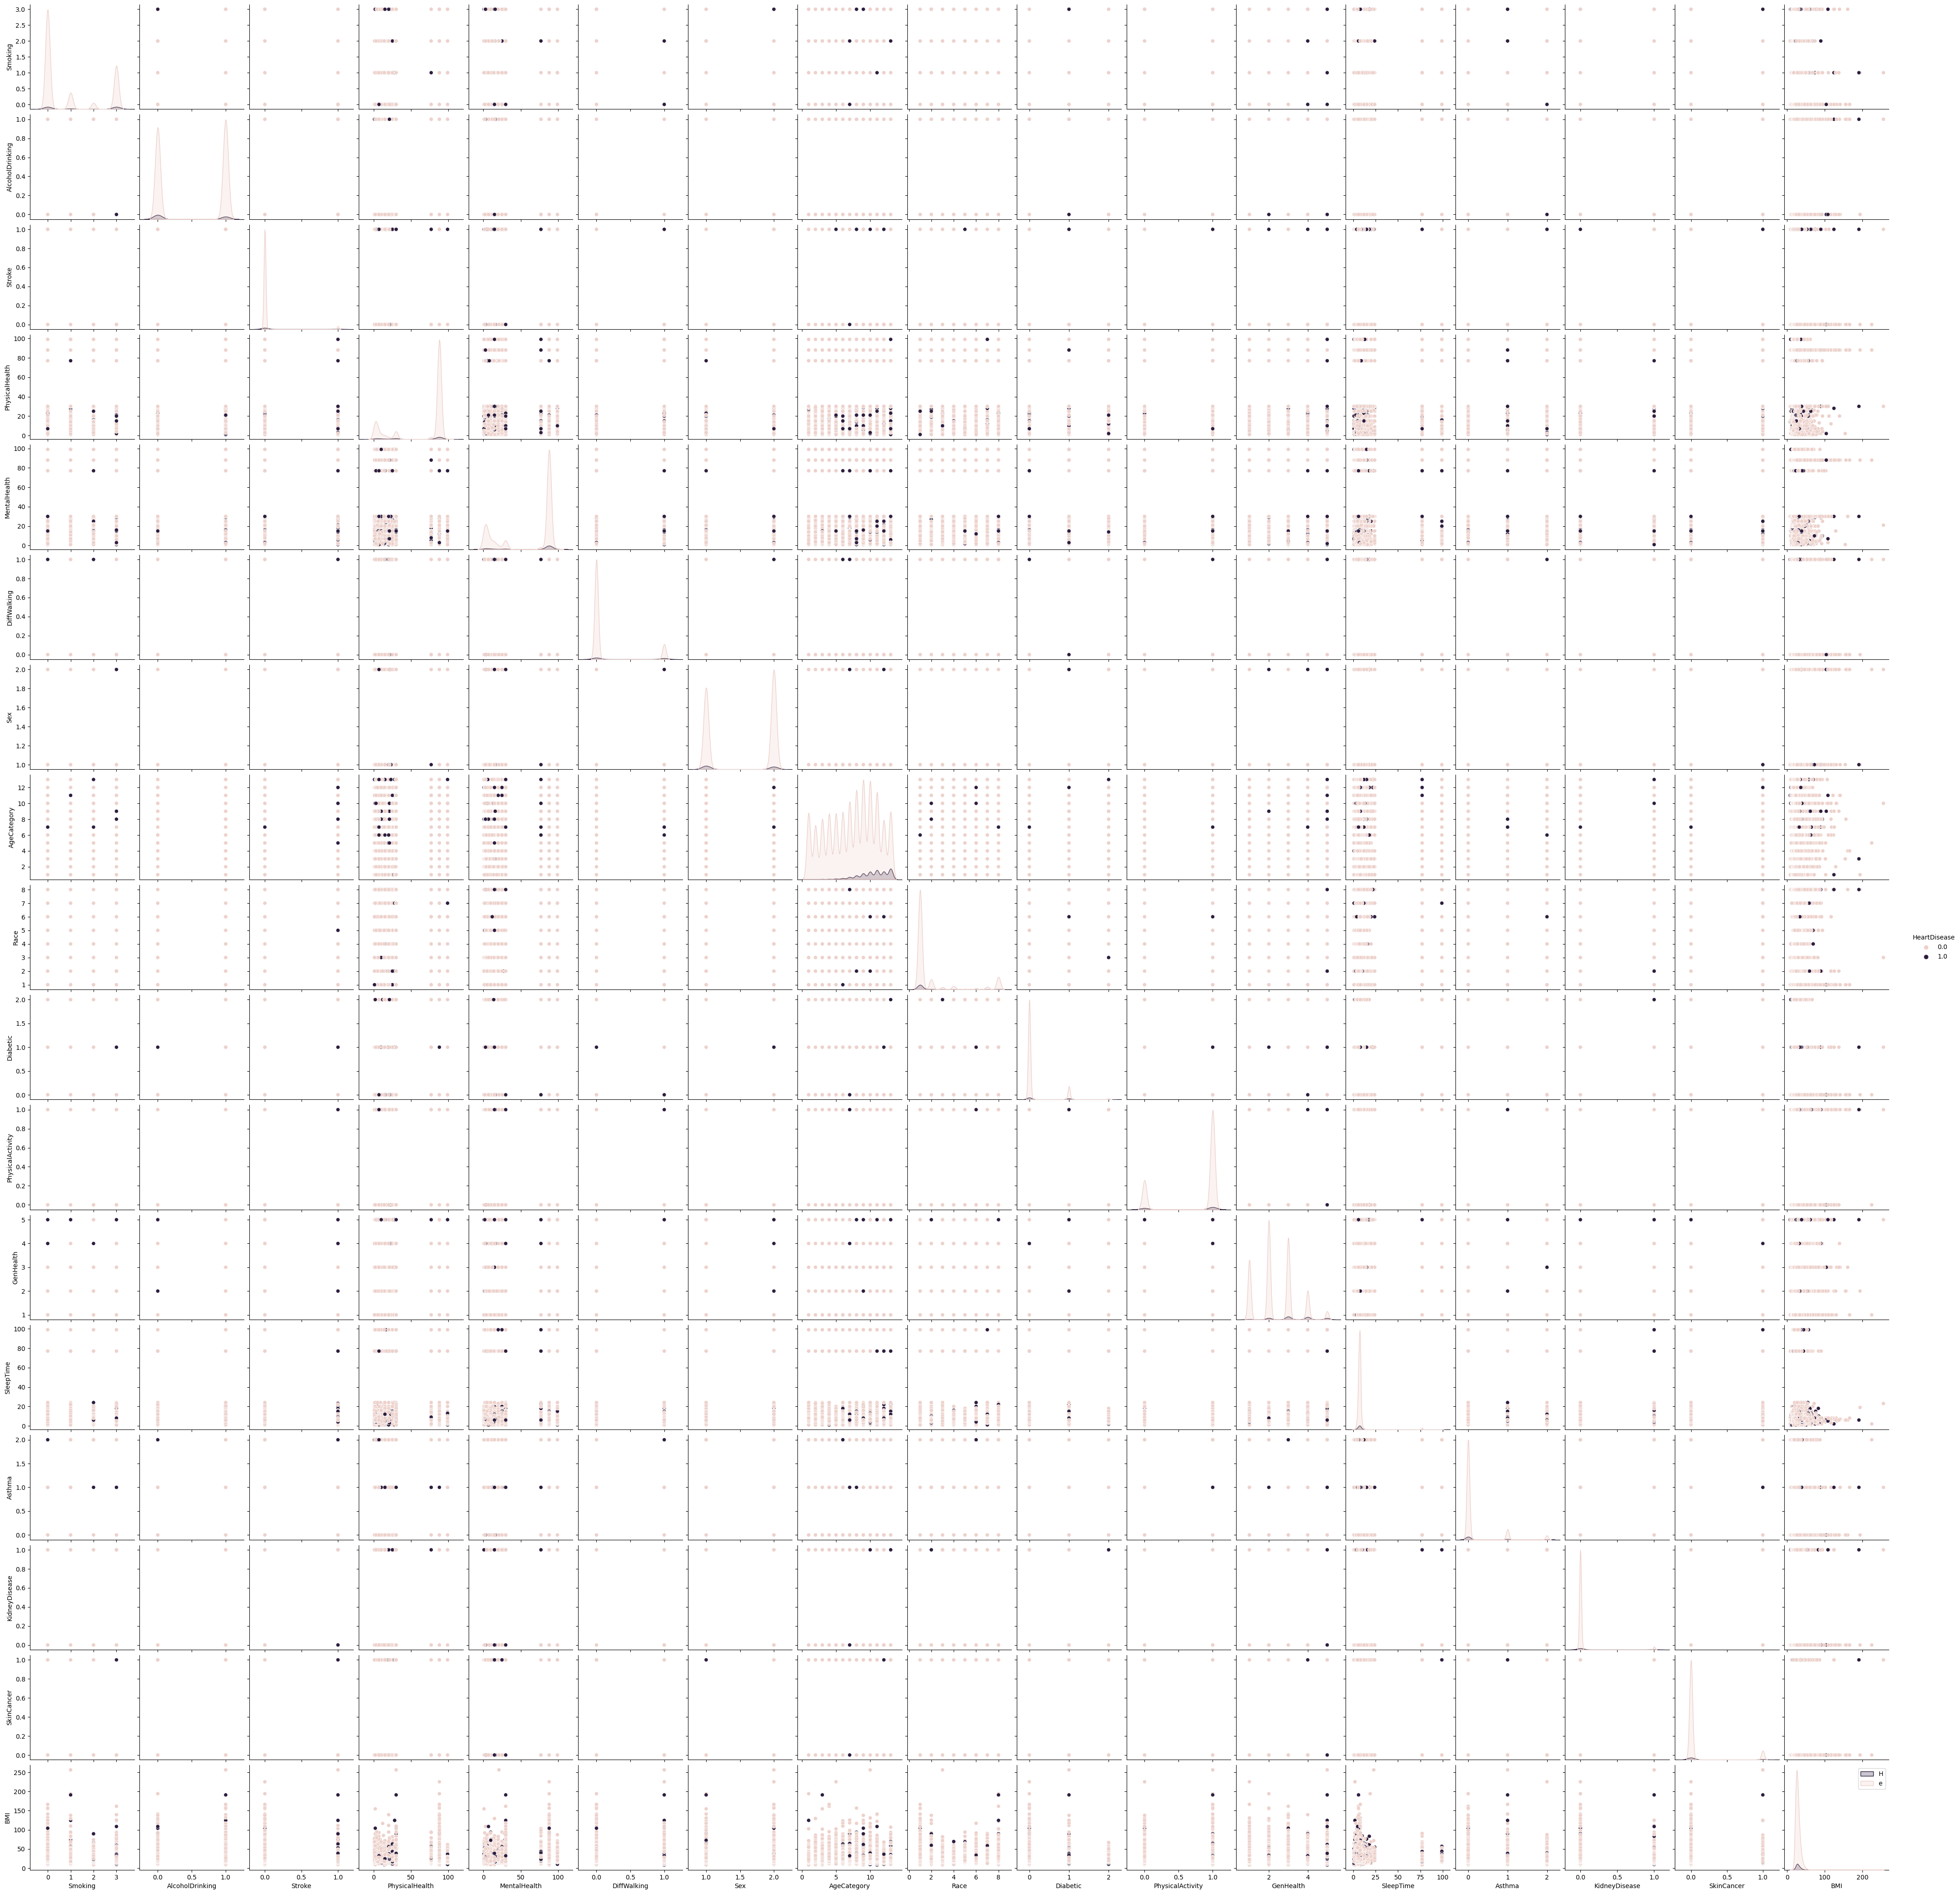

In [21]:
sns.pairplot(data = df , hue= 'HeartDisease')
plt.legend('HeartDisease')

# Clustering

In [1]:
df = pd.read_csv('datasets/heart_imputed_3.csv')

NameError: name 'pd' is not defined

In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,2918.0
2,No,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,5448.0
3,No,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,80 and More,White,No,No,Excellent,6.0,Never,No,No,5472.0
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,80 and More,White,No,Yes,Very Good,7.0,Never,No,No,2034.0


In [9]:
arrays = df.values

In [8]:
kproto = KPrototypes(n_clusters = 3, max_iter=20)

In [17]:
clusters = kproto.fit_predict(arrays, categorical=[0,3,4,5,8,9,10,11,12,13,14,16,17,18])

In [19]:
clusters

array([2, 2, 1, ..., 2, 2, 2], dtype=uint16)

In [20]:
df['clus'] = clusters

In [21]:
df.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc,clus
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,...,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0,2
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Former,No,No,2918.0,2
2,No,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Never,No,No,5448.0,1
3,No,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,...,White,No,No,Excellent,6.0,Never,No,No,5472.0,0
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,...,White,No,Yes,Very Good,7.0,Never,No,No,2034.0,2


In [22]:
print(kproto.cluster_centroids_)

[['5809.409957304056' '9173.065035071668' '70.97674595913388'
  '68.62824031716987' '9.89417505336993' '4459.654772796584' 'No' 'Never'
  'No' 'No' 'No' 'Female' 'Not Clear' 'White' 'No' 'Yes' 'Good' 'Never'
  'No' 'No']
 ['9284.151462433401' '509.85457214309014' '67.02555181037295'
  '63.443024899423726' '8.969772751984342' '5505.1310209851035' 'No'
  'Never' 'No' 'No' 'No' 'Female' '65-69' 'White' 'No' 'Yes' 'Good'
  'Never' 'No' 'No']
 ['180.65255042543083' '519.9703980045782' '65.92901297887963'
  '61.100845462791' '7.825513972271412' '2815.2282560575304' 'No' 'Never'
  'Yes' 'No' 'No' 'Female' '65-69' 'White' 'No' 'Yes' 'Very Good' 'Never'
  'No' 'No']]


In [27]:
df[df['clus'] == 2].head(20)

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc,clus
0,No,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,...,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0,2
1,No,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,...,Black,No,Yes,Good,7.0,Former,No,No,2918.0,2
4,No,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,...,White,No,Yes,Very Good,7.0,Never,No,No,2034.0,2
5,No,180.0,509.0,Former Smoker,No,No,20.0,30.0,No,Male,...,White,Yes,Yes,Fair,8.0,Current,No,No,2658.0,2
6,No,150.0,506.0,Never,No,No,88.0,88.0,No,Female,...,White,No,No,Good,6.0,Never,No,Yes,2421.0,2
7,No,150.0,503.0,Smoker,Refused,No,15.0,10.0,No,Female,...,Black,Yes,Yes,Fair,6.0,Never,No,No,2657.0,2
8,No,170.0,511.0,Never,No,No,28.0,88.0,Yes,Female,...,White,No,Yes,Very Good,8.0,Never,No,No,2371.0,2
9,Yes,163.0,503.0,Former Smoker,No,No,6.0,88.0,Yes,Female,...,Black,No,No,Fair,12.0,Never,No,No,2887.0,2
10,No,134.0,506.0,Never,No,No,15.0,88.0,No,Female,...,White,No,Yes,Fair,4.0,Current,No,Yes,2163.0,2
11,No,162.0,500.0,Former Smoker,No,No,5.0,88.0,Yes,Female,...,White,Yes,No,Good,9.0,Current,No,No,3164.0,2


In [ ]:
cat_var = df[['HeartDisease',
    'Stroke',
    'PhysicalActivity',
    'DiffWalking',
    'SkinCancer',
    'KidneyDisease',
    'Race',
    'Diabetic',
    'GenHealth']]

In [13]:
cat_dummies = pd.get_dummies(cat_var, drop_first=True)
cat_dummies.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
4,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0


In [15]:
scaler = MinMaxScaler()
cat_dummies = pd.DataFrame(scaler.fit_transform(cat_dummies), columns = cat_dummies.columns)

In [16]:
cat_dummies.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,0.125,0.125,0.000,0.125,0.000,0.125,0.000,0.00,0.125
1,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.25,0.250
2,0.125,0.125,0.000,0.125,0.125,0.125,0.125,0.25,0.250
3,0.125,0.125,0.125,0.125,0.125,0.125,0.000,0.25,0.000
4,0.125,0.000,0.000,0.125,0.125,0.125,0.000,0.25,0.125


In [17]:
# Specify the number of neighbors (k) to consider
k = 5 

# Create a KNNImputer object with categorical handling strategy
imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
df_imputed = imputer.fit_transform(cat_dummies)

In [20]:
df_imputed = pd.DataFrame(df_imputed, columns = cat_dummies.columns)

In [31]:
df_imputed.isna().any()

HeartDisease        False
Stroke              False
PhysicalActivity    False
DiffWalking         False
SkinCancer          False
KidneyDisease       False
Race                False
Diabetic            False
GenHealth           False
dtype: bool

In [30]:
df_imputed.isna().sum()

HeartDisease        0
Stroke              0
PhysicalActivity    0
DiffWalking         0
SkinCancer          0
KidneyDisease       0
Race                0
Diabetic            0
GenHealth           0
dtype: int64

In [32]:
for column in df_imputed.columns:
    unique_values = len(df_imputed[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 5
Stroke : 5
PhysicalActivity : 5
DiffWalking : 20
SkinCancer : 5
KidneyDisease : 4
Race : 10
Diabetic : 7
GenHealth : 11


In [28]:
df_imputed = pd.DataFrame(df_imputed, columns = cat_dummies.columns)

In [35]:
df_imputed.head()

,HeartDisease,Stroke,PhysicalActivity,DiffWalking,SkinCancer,KidneyDisease,Race,Diabetic,GenHealth
0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
1,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0
3,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0
4,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0


In [34]:
for column in df_imputed.columns:
    unique_values = df_imputed[column].unique()
    print(f"{column} : {unique_values}")

HeartDisease : [2.  1.  7.  9.  1.8]
Stroke : [2.  1.  7.  9.  1.8]
PhysicalActivity : [1.  2.  7.  1.2 9. ]
DiffWalking : [2.  1.  1.4 7.  9.  3.2 1.8 1.2 2.8 1.6 2.6 3.  2.4 3.4 2.2 4.8 6.2 3.8
 4.4 7.6]
SkinCancer : [1.  2.  7.  9.  1.8]
KidneyDisease : [2. 1. 7. 9.]
Race : [1.  2.  9.  4.  3.  7.  8.  6.  5.  1.4]
Diabetic : [1.  3.  4.  2.  2.6 7.  9. ]
GenHealth : [2.  3.  1.  4.  5.  7.  9.  2.8 1.2 3.4 2.6]


In [48]:
num_var = df.drop(cat_var.columns, axis=1)

In [49]:
num_var = num_var.drop(['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Asthma'], axis=1)

In [50]:
num_var.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,106.0,507.0,3.0,30.0,5.0,1660.0
1,170.0,504.0,88.0,88.0,7.0,2918.0
2,7777.0,508.0,88.0,88.0,7.0,NaN
3,9999.0,9999.0,88.0,88.0,6.0,NaN
4,126.0,506.0,88.0,88.0,7.0,2034.0


In [54]:
scaler = MinMaxScaler()

In [66]:
num_dummies = pd.get_dummies(num_var, drop_first=True)

In [67]:
num_dummies = pd.DataFrame(scaler.fit_transform(num_dummies), columns = num_dummies.columns)

In [68]:
num_dummies.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,0.005629,0.030934,0.020408,0.295918,0.040816,0.053003
1,0.012062,0.030628,0.887755,0.887755,0.061224,0.198588
2,0.776661,0.031036,0.887755,0.887755,0.061224,NaN
3,1.000000,1.000000,0.887755,0.887755,0.051020,NaN
4,0.007639,0.030832,0.887755,0.887755,0.061224,0.096285


In [69]:
k = 5
imputer = KNNImputer(n_neighbors=k, weights="uniform", metric="nan_euclidean")
df_imputed_num = imputer.fit_transform(num_dummies)

In [72]:
df_imputed_num = pd.DataFrame(df_imputed_num, columns = num_dummies.columns)

In [73]:
df_imputed_num.isna().sum()

BMI1              0
BMI2              0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
BMI_calc          0
dtype: int64

In [74]:
df_imputed_num.head()

,BMI1,BMI2,PhysicalHealth,MentalHealth,SleepTime,BMI_calc
0,0.005629,0.030934,0.020408,0.295918,0.040816,0.053003
1,0.012062,0.030628,0.887755,0.887755,0.061224,0.198588
2,0.776661,0.031036,0.887755,0.887755,0.061224,0.069367
3,1.000000,1.000000,0.887755,0.887755,0.051020,0.424048
4,0.007639,0.030832,0.887755,0.887755,0.061224,0.096285


In [29]:
df = pd.read_csv('datasets/heart_imputed_3.csv')

In [30]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
for column in df.columns:
    unique_values = len(df3[column].unique())
    print(f"{column} : {unique_values}")

HeartDisease : 4
BMI1 : 574
BMI2 : 147
Smoking : 5
AlcoholDrinking : 4
Stroke : 4
PhysicalHealth : 33
MentalHealth : 33
DiffWalking : 4
Sex : 2
AgeCategory : 14
Race : 9
Diabetic : 6
PhysicalActivity : 4
GenHealth : 7
SleepTime : 26
Asthma : 4
KidneyDisease : 4
SkinCancer : 4
BMI_calc : 3769


In [38]:
df3 = df.copy()
values = pd.unique(df3["HeartDisease"])
for value in values:
    conversion = val_converter(df3, 'HeartDisease', value)
    df3["HeartDisease"].replace(value, conversion, inplace = True)


In [39]:
df3.head()

,HeartDisease,BMI1,BMI2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_calc
0,None,106.0,507.0,Smoker,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very Good,5.0,Current,No,Yes,1660.0
1,None,170.0,504.0,Not Clear,Refused,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Former,No,No,2918.0
2,None,7777.0,508.0,Never,No,No,88.0,88.0,No,Female,65-69,Black,No,Yes,Good,7.0,Never,No,No,5448.0
3,None,9999.0,9999.0,Never,No,No,88.0,88.0,No,Female,80 and More,White,No,No,Excellent,6.0,Never,No,No,5472.0
4,None,126.0,506.0,Never,No,Yes,88.0,88.0,No,Female,80 and More,White,No,Yes,Very Good,7.0,Never,No,No,2034.0
